# SVM 분류 - 피마 인디언 당뇨병 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기

In [11]:
import warnings
warnings.filterwarnings(action='ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
from sklearnex import patch_sklearn
patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### [2] 데이터 가져오기

In [12]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'], info=False)

## #02. 데이터 전처리

### [1] 이전 예제에서 수립한 전처리 전략 재현

1. `0`값을 포함해서는 안되는 변수에 대해 평균으로 대체



In [13]:
# 정제 대상 필드명
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# `0`값을 결측치로 대체후 평균으로 다시 치환
df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df2 = my_replace_missing_value(df)

## #03. SVM 분류 적용

### [1] 훈련, 검증 데이터 분리

In [14]:
df2['Outcome'] = df2['Outcome'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Outcome', test_size=0.2, scalling=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [2] 분류 알고리즘 적용

n_jobs를 허용하지 않음
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[교차검증 TOP5]
+----+----------+----------+-----+-------------------+
|    | kernel   |   degree |   C |   mean_test_score |
|----+----------+----------+-----+-------------------|
| 17 | poly     |        2 |  10 |          0.770412 |
|  9 | poly     |        2 |   1 |          0.763894 |
| 19 | poly     |        3 |  10 |          0.759016 |
| 22 | rbf      |        5 |  10 |          0.759003 |
| 20 | rbf      |        4 |  10 |          0.759003 |
+----+----------+----------+-----+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.778502 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,

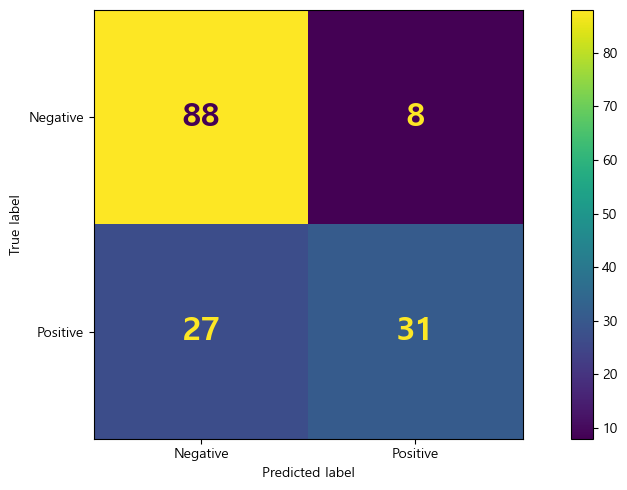


[학습곡선]


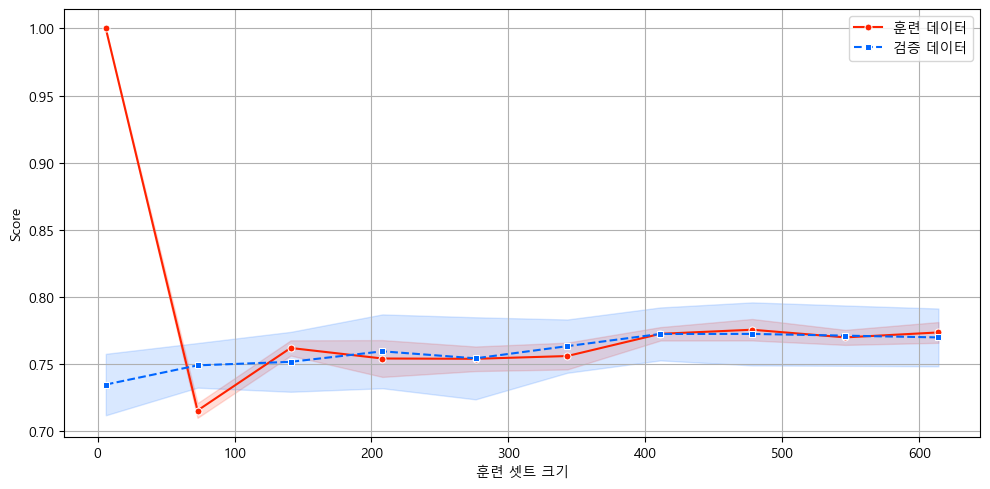

SVC(C=10, degree=2, kernel='poly')

In [15]:
my_svc_classification(x_train, y_train, x_test, y_test)